In [23]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [24]:
pd.set_option('display.max_columns', None)

# Para mostrar todas las filas
pd.set_option('display.max_rows', 30)

In [25]:
defunciones= pd.read_csv("defunciones\defunciones\DEFUNCIONES_FUENTE_DEIS_1990_2021_CIFRAS_OFICIALES.csv",sep=";",encoding="latin-1" )
columnas_filtro = [
    'AÑO',
    'FECHA_DEF',
    'SEXO_NOMBRE',
    'EDAD_TIPO',
    'EDAD_CANT',
    'COD_COMUNA',
    'COMUNA',
    'NOMBRE_REGION',
    'DIAG1',
    'CAPITULO_DIAG1',
    'DIAG2',
    'LUGAR_DEFUNCION'
]
defuncion_nodupli = defunciones.drop_duplicates(subset=columnas_filtro)
defuncion_nodupli.info()

C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9064\2355824792.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones= pd.read_csv("defunciones\defunciones\DEFUNCIONES_FUENTE_DEIS_1990_2021_CIFRAS_OFICIALES.csv",sep=";",encoding="latin-1" )


<class 'pandas.core.frame.DataFrame'>
Index: 2921723 entries, 0 to 2923255
Data columns (total 27 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   AÑO                        int64  
 1   FECHA_DEF                  object 
 2   SEXO_NOMBRE                object 
 3   EDAD_TIPO                  float64
 4   EDAD_CANT                  int64  
 5   COD_COMUNA                 int64  
 6   COMUNA                     object 
 7   NOMBRE_REGION              object 
 8   DIAG1                      object 
 9   CAPITULO_DIAG1             object 
 10  GLOSA_CAPITULO_DIAG1       object 
 11  CODIGO_GRUPO_DIAG1         object 
 12  GLOSA_GRUPO_DIAG1          object 
 13  CODIGO_CATEGORIA_DIAG1     object 
 14  GLOSA_CATEGORIA_DIAG1      object 
 15  CODIGO_SUBCATEGORIA_DIAG1  object 
 16  GLOSA_SUBCATEGORIA_DIAG1   object 
 17  DIAG2                      object 
 18  CAPITULO_DIAG2             object 
 19  GLOSA_CAPITULO_DIAG2       object 
 20  CODIGO_

In [26]:
defuncion_nodupli["MES"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: int(x[5:7]) if type(x) != float else "Nan")
defuncion_nodupli["AÑO"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: int(x[0:4]) if type(x) != float else "Nan")
defuncion_nodupli["AÑO_MES"] = defuncion_nodupli["AÑO"].astype(str) + "-" + defuncion_nodupli["MES"].astype(str)
defuncion_nodupli

C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9064\896492573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defuncion_nodupli["MES"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: int(x[5:7]) if type(x) != float else "Nan")
C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_9064\896492573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defuncion_nodupli["AÑO"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: int(x[0:4]) if type(x) != float else "Nan")
C:\Users\Unidad Academic

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION,MES,AÑO_MES
0,1994,1994-10-22,Hombre,1.0,17,8304,Laja,Del Bíobío,8629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,966X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro,10,1994-10
1,1995,1995-04-15,Hombre,1.0,50,6115,Rengo,Del Libertador B. O'Higgins,9941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro,4,1995-4
2,1995,1995-04-09,Hombre,1.0,50,13108,Independencia,Metropolitana de Santiago,9941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,984X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro,4,1995-4
3,1995,1995-08-31,Hombre,1.0,35,8101,Concepción,Del Bíobío,8540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica,8,1995-8
4,1995,1995-09-11,Hombre,1.0,36,7301,Curicó,Del Maule,9893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica,9,1995-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923251,2021,2021-11-07,Mujer,1.0,93,13115,Lo Barnechea,Metropolitana de Santiago,E149,E00-E90,"Enfermedades endocrinas, nutricionales y metabólicas",E10-E14,Diabetes mellitus,E14,"Diabetes mellitus, no especificada",E149,DIABETES MELLITUS NO ESPECIFICADA SIN MENCIÓN DE COMPLICACIÓN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación,11,2021-11
2923252,2021,2021-10-09,Mujer,1.0,88,5402,Cabildo,De Valparaíso,B679,A00-B99,Ciertas enfermedades infecciosas y parasitarias,B65-B83,Helmintiasis,B67,Equinococosis,B679,EQUINOCOCOSIS OTRA Y LA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación,10,2021-10
2923253,2021,2021-11-17,Hombre,1.0,80,13104,Conchalí,Metropolitana de Santiago,I110,I00-I99,Enfermedades del sistema circulatorio,I10-I15,Enfermedades hipertensivas,I11,Enfermedad cardíaca hipertensiva,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica,11,2021-11
2923254,2021,2021-02-03,Hombre,1.0,80,13122,Peñalolén,Metropolitana de Santiago,I120,I00-I99,Enfermedades del sistema circulatorio,I10-I15,Enfermedades hipertensivas,I12,Enfermedad renal hipertensiva,I120,ENFERMEDAD RENAL HIPERTENSIVA CON INSUFICIENCIA RENAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación,2,2021-2


In [32]:
defuncion_nodupli_gruoped = defuncion_nodupli.groupby(by="AÑO_MES").size().reset_index(name="Count")
defuncion_nodupli_gruoped["AÑO"] = defuncion_nodupli_gruoped["AÑO_MES"].apply(lambda x: int(x[0:4]) if "Nan" not in x else "Nan")
defuncion_nodupli_gruoped["AÑO"]

0      1990
1      1990
2      1990
3      1990
4      1990
       ... 
380    2021
381    2021
382    2021
383    2021
384     Nan
Name: AÑO, Length: 385, dtype: object

In [34]:
type(defuncion_nodupli_gruoped["AÑO"][4])

int

In [36]:
defuncion_nodupli_gruoped = defuncion_nodupli_gruoped[defuncion_nodupli_gruoped["AÑO"].apply(lambda x: isinstance(x, int))]
defuncion_nodupli_gruoped

,AÑO_MES,Count,AÑO
0,1990-1,6197,1990
1,1990-10,6206,1990
2,1990-11,5762,1990
3,1990-12,5869,1990
4,1990-2,5129,1990
...,...,...,...
379,2021-5,12759,2021
380,2021-6,13519,2021
381,2021-7,13201,2021
382,2021-8,11372,2021


In [37]:
defuncion_nodupli_gruoped = defuncion_nodupli_gruoped[defuncion_nodupli_gruoped["AÑO"] > 2005]
defuncion_nodupli_gruoped

,AÑO_MES,Count,AÑO
192,2006-1,6976,2006
193,2006-10,7150,2006
194,2006-11,6699,2006
195,2006-12,7131,2006
196,2006-2,5936,2006
...,...,...,...
379,2021-5,12759,2021
380,2021-6,13519,2021
381,2021-7,13201,2021
382,2021-8,11372,2021


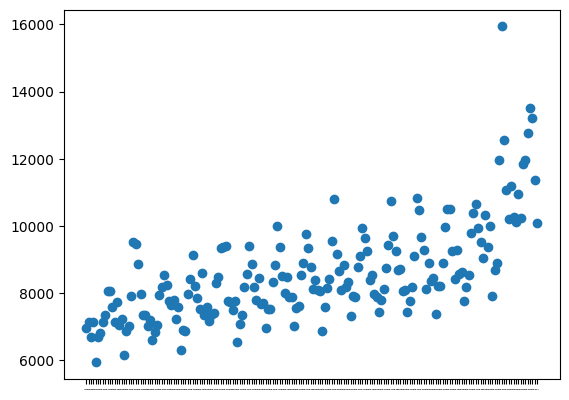

In [43]:
plt.xticks(fontsize=0)  # Tamaño de la fuente para las etiquetas del eje X
plt.scatter(data=defuncion_nodupli_gruoped, x="AÑO_MES", y="Count")

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Transformamos todos los meses de cada año a un numero

In [47]:
defuncion_nodupli_gruoped.sort_values(by="AÑO_MES", key=(lambda x: (int(x[0:4]), int(x[5:]))))

TypeError: cannot convert the series to <class 'int'>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)